In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to display full text
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-3b5970faf0be>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo.csv', encoding = 'utf-8', header = None)

In [4]:
df.columns = ['src_tweet_id', 'src_user_id', 'src_tweet','src_date','reply_tweet_id','reply_user_id','reply_tweet','reply_date', 'label']

In [5]:
df.head()

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,552785249420447745,18370911,"Now 10 dead in a shooting there today RT ""@BBCDanielS: Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago”",Wed Jan 07 11:14:08 +0000 2015,0
1,552784600502915072,331658004,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,552786761534144512,2806109387,@BBCDanielS @BBCWorld I'm guessing this is being considered terrorism right now or lone wolf?,Wed Jan 07 11:20:08 +0000 2015,0
2,552784600502915072,331658004,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,552786803884060672,146142164,@BBCDanielS @BBCWorld why would you mention that before knowing the facts #islamphobiaatitsbest,Wed Jan 07 11:20:18 +0000 2015,0
3,552784600502915072,331658004,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,552786954656710656,940853760,@BBCDanielS @BBCWorld perps identified?,Wed Jan 07 11:20:54 +0000 2015,0
4,552784600502915072,331658004,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,552787979224092672,2888783532,@BBCDanielS @BBCWorld who is charlie hebdo?,Wed Jan 07 11:24:59 +0000 2015,0


In [6]:
df.shape

(36189, 9)

+ change data type

In [7]:
df.src_tweet_id = df.src_tweet_id.astype(str)
df.src_user_id = df.src_user_id.astype(str)

df.reply_tweet_id = df.reply_tweet_id.astype(str)
df.reply_tweet_id = df.reply_tweet_id.replace('nan',np.nan)

df.reply_user_id = df.reply_user_id.astype(str)
df.reply_user_id = df.reply_user_id.replace('nan',np.nan)

df.src_date = df.src_date.apply(pd.to_datetime)
df.reply_date = df.reply_date.apply(pd.to_datetime)

df.reply_tweet = df.reply_tweet.replace(np.nan,"")

+ Source Tweet Data: **src_tw_df**

In [8]:
#Source tweet data
src_tw_df = df.iloc[:,[0,1,2,3,8]].copy()
src_tw_df = src_tw_df.drop_duplicates().reset_index()

In [9]:
src_tw_df.head()

,index,src_tweet_id,src_user_id,src_tweet,src_date,label
0,0,552784600502915072,331658004,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,2015-01-07 11:11:33+00:00,0
1,39,552784898743099392,465973,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,2015-01-07 11:12:44+00:00,0
2,48,552785391653494784,15798091,Prediction: the #CharlieHebdo massacre will not dent the political class's complacency one iota,2015-01-07 11:14:42+00:00,0
3,79,552786116404072448,465973,"10:28am Charlie Hebdo account mocks ISIS leader, wishing him ""good health and best wishes"" http://t.co/9Oa2xAqOcM http://t.co/uYXayKLA7q",2015-01-07 11:17:35+00:00,0
4,84,552786299875520512,144301368,"If your faith isn't strong enough to cope with satirical poke, it oughtn't be strong enough to induce you to kill. Barbaric #CharlieHebdo",2015-01-07 11:18:18+00:00,0


# EDA

## Missing Value

In [10]:
df.isnull().sum()

src_tweet_id      0
src_user_id       0
src_tweet         0
src_date          0
reply_tweet_id    0
reply_user_id     0
reply_tweet       0
reply_date        0
label             0
dtype: int64

+ drop rows where there is missing value.

In [11]:
df.dropna(inplace=True)

## Statistics

In [12]:
print("# of source tweets:",src_tw_df.src_tweet_id.nunique())
print("# of source users:",src_tw_df.src_user_id.nunique())
print("# of reply users:",df.reply_user_id.nunique())
print("# of reply tweets:",df.reply_tweet_id.nunique())

# of source tweets: 2002
# of source users: 1006
# of reply users: 17992
# of reply tweets: 36189


## Visualiztion 

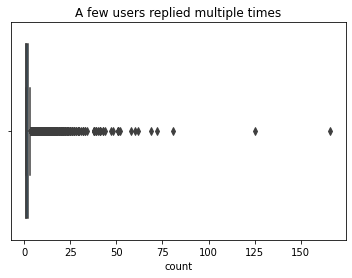

In [13]:
reply_user = df.reply_user_id.value_counts().sort_values(ascending=False).to_frame()
reply_user.rename(columns={'reply_user_id' :'count'},inplace=True)
sns.boxplot(data=reply_user ,x='count')
plt.title("A few users replied multiple times")
plt.savefig('graph/charliehebdo/reply_user-1.pdf',dpi=300)

In [15]:
more_freq_reply_user = reply_user.loc[reply_user['count'] > 1].index
len(more_freq_reply_user)

5143

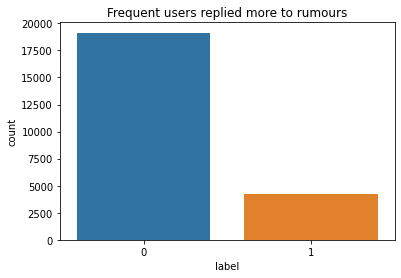

In [16]:
more_freq = df[df['reply_user_id'].isin(more_freq_reply_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Frequent users replied more to rumours')
plt.savefig('graph/prince-toronto/reply_user-2.pdf',dpi=300)

           count
7587032    44   
16973333   44   
5402612    41   
64643056   39   
3108351    38   
...        ..   
86516574   1    
257824868  1    
36311109   1    
30886757   1    
169272033  1    

[1006 rows x 1 columns]


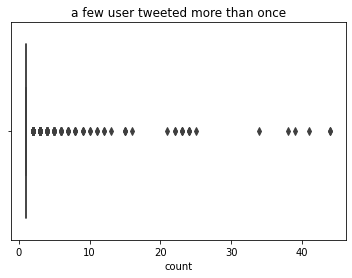

<Figure size 432x288 with 0 Axes>

In [17]:
source_user = src_tw_df.src_user_id.value_counts().sort_values(ascending=False).to_frame()
source_user.rename(columns={'src_user_id' :'count'},inplace=True)
print(source_user)
sns.boxplot(data=source_user ,x='count')
plt.title('a few user tweeted more than once',fontsize = 12)
plt.show()
plt.savefig('graph/charliehebdo/source_user-1.pdf',dpi=300)

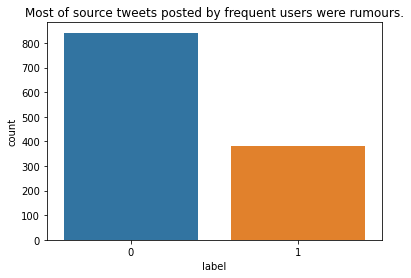

In [18]:
more_freq_src_user = source_user.loc[source_user['count'] > 1].index
more_freq_src_user
more_freq = src_tw_df[src_tw_df['src_user_id'].isin(more_freq_src_user)]
# more_freq.label.value_counts().
sns.countplot(data=more_freq ,x='label')
plt.title('Most of source tweets posted by frequent users were rumours.')
plt.savefig('graph/charliehebdo/src_user-2.pdf',dpi=300)

In [ ]:
df.groupby('src_tweet_id')['label'].value_counts().sort_values('label')#.plot(kind = 'bar')
# plt.title('Rumour tweet are more than non-rumor tweet',fontsize = 14)
# plt.xlabel('Rumor / Non-Rumour', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.show()